<a href="https://colab.research.google.com/github/nguynphm56/Data_Mining/blob/main/Lab4_BTTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
total = df.isnull().sum().sort_values(ascending=False) 
percent_1=df.isnull().sum()/df.isnull().count()*100 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) 
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head()

,Total,%
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


=> Không có dữ liệu rỗng

2. Sử dụng biểu đồ tần suất (Histogram) trong thư viện matplotlib để biểu diễn phân
phối của lần lượt các thuộc tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm.

<ipython-input-15-c7622414900e>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-15-c7622414900e>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-15-c7622414900e>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

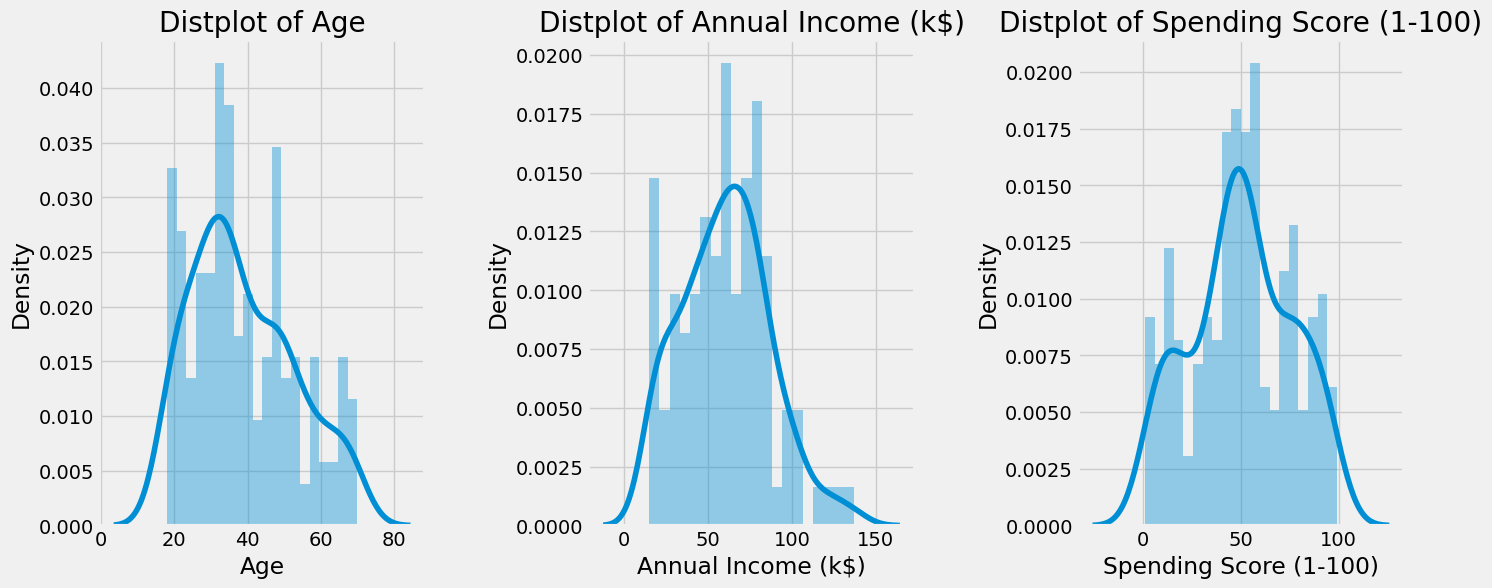

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

3. Thống kê số mẫu dữ liệu theo giới tính

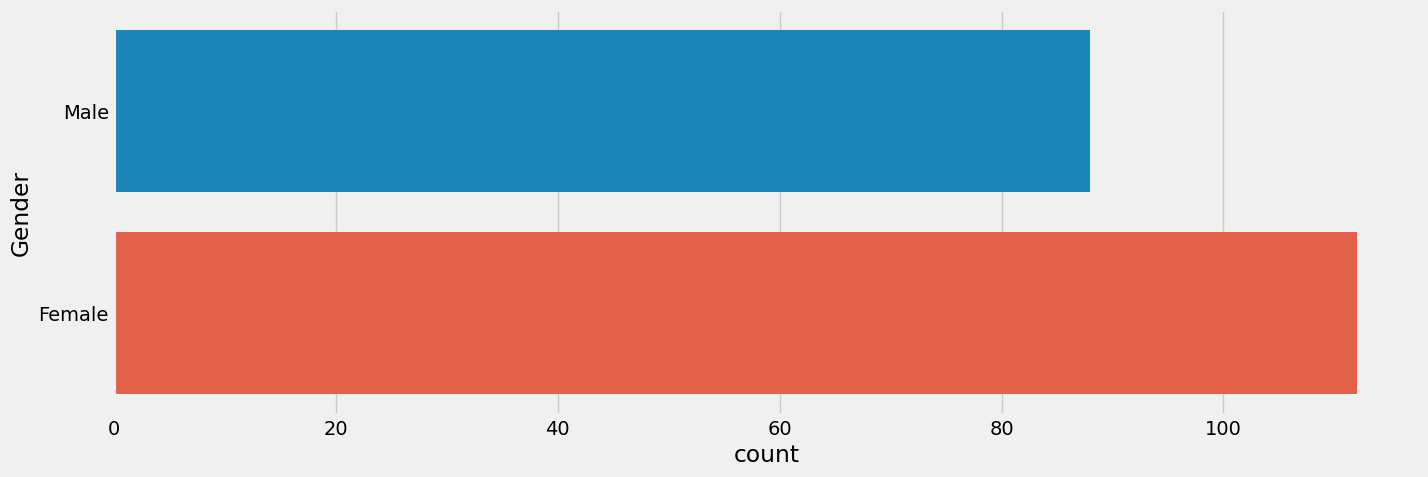

In [ ]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

4. Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và
Thu nhập hằng năm theo Giới tính.

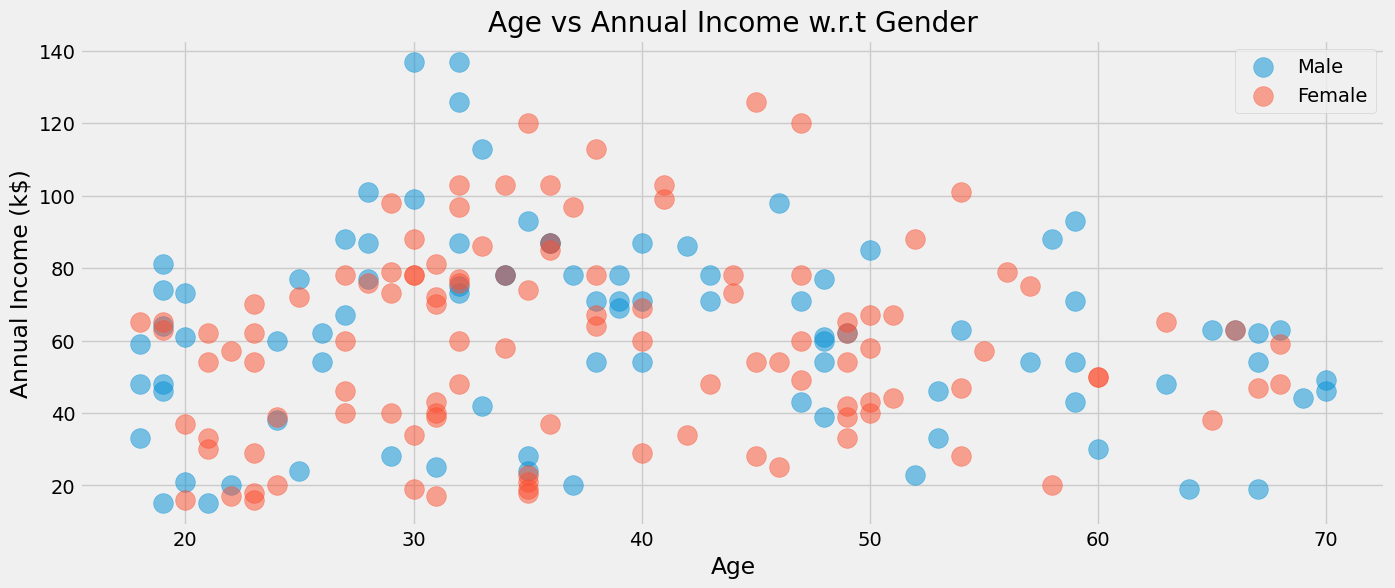

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender],
              s = 200, alpha = 0.5, label =gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

5. Tương tự, sinh viên thực hiện vẽ biểu đồ khảo sát sự phân bố của thuộc tính Thu
nhập hằng năm và Số điểm mua sắm theo Giới tính.

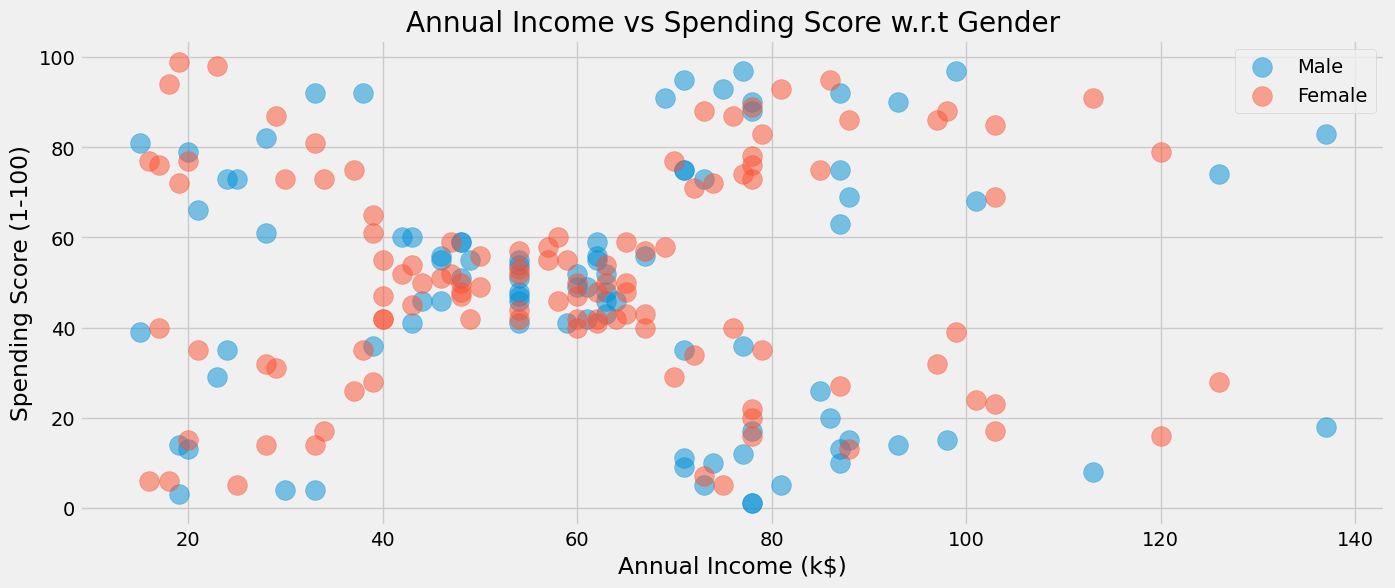

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df[df['Gender'] == gender],
              s = 200, alpha = 0.5, label =gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

6. Chọn thuộc tính Tuổi và Số điểm mua sắm để gom cụm. Sử dụng phương pháp khuỷu
tay (ELBOW method) để xác định số cụm cần thiết. Tiến hành gom cụm bằng thuật
toán k-Means với số cụm vừa xác định.

In [ ]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm = KMeans(n_clusters = n, init = 'random')
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

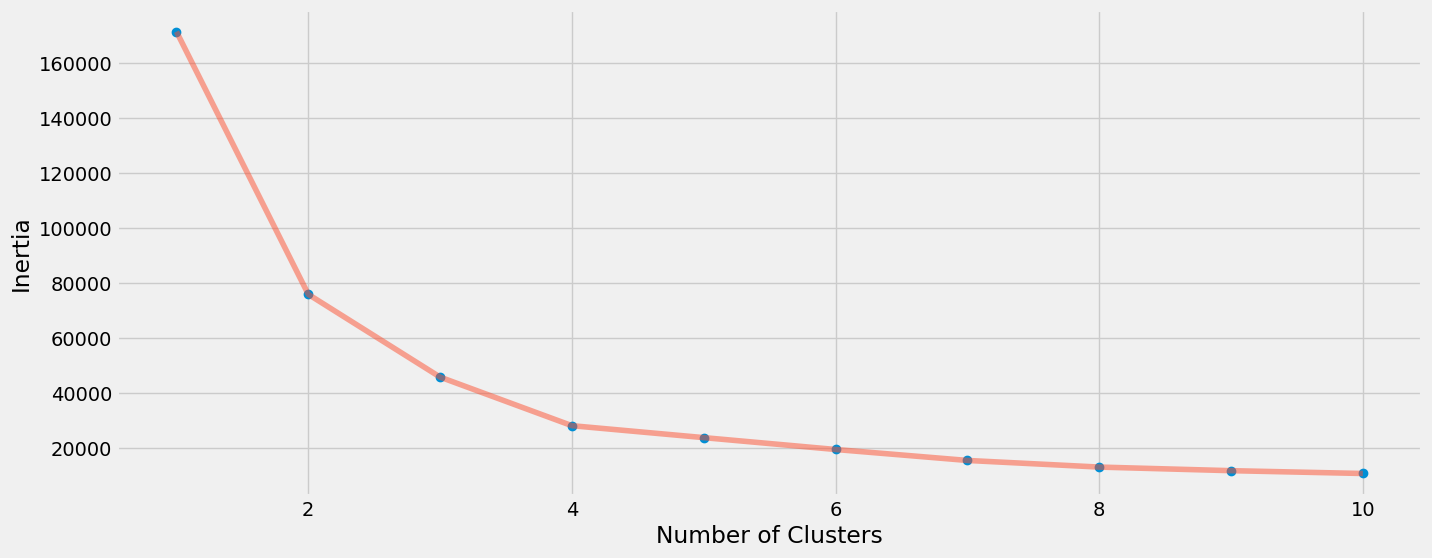

In [ ]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4 (k=4).

Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm

In [ ]:
algorithm = KMeans(n_clusters = 4, init = 'random')
algorithm.fit(X1)
label1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



7. Biểu diễn kết quả gom cụm trên bằng biểu đồ.

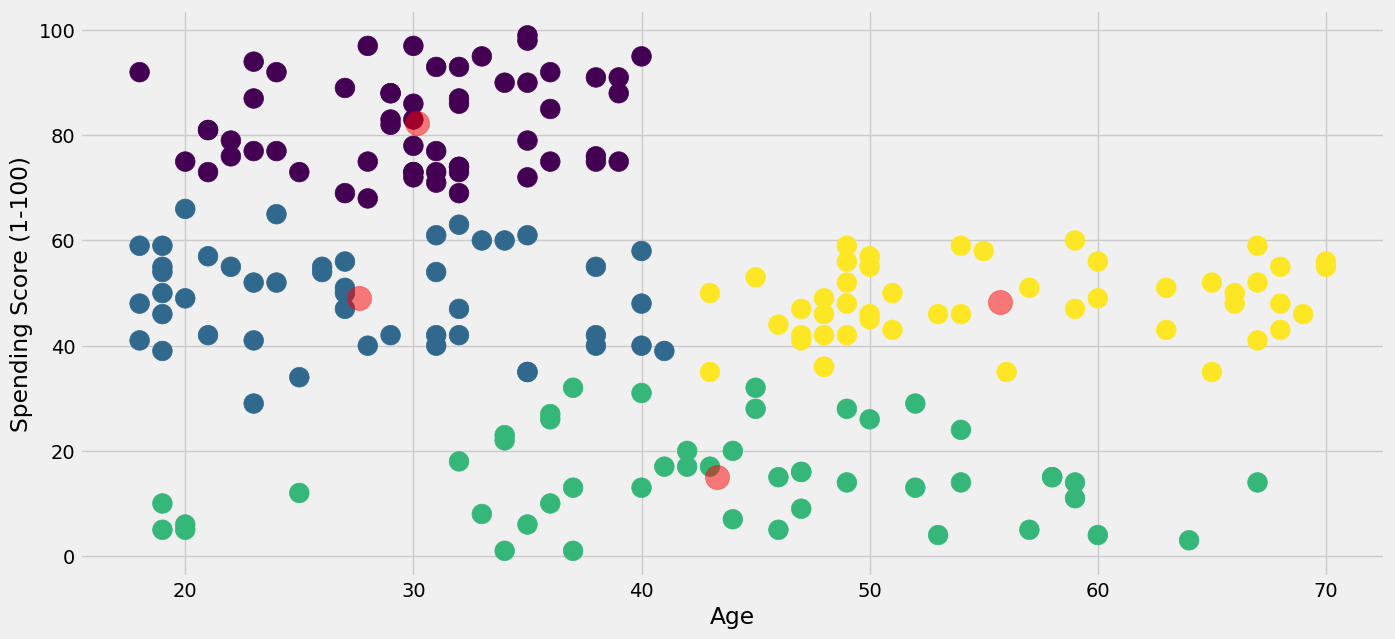

In [ ]:
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = label1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

8. Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient).

Sử dụng thư viện sklearn để tính hệ số dáng điệu cho trường hợp trên bằng lệnh sau

In [ ]:
metrics.silhouette_score(X1, label1, metric = 'euclidean')

0.49973941540141753

==> Vì giá trị của hệ số dáng điệu ở trên là 0.4997, nó gần bằng 0.5 nhưng không đạt tới giá trị lớn hơn nữa, có thể cho thấy rằng phân cụm có một mức độ tốt nhất định, nhưng chưa đủ tối ưu.

9. Thực hiện tương tự câu 6-8 với trường hợp gom cụm theo các thuộc tính:</br>
- Thu nhập hằng năm và Số điểm mua sắm.

In [ ]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm = KMeans(n_clusters = n, init = 'random')
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

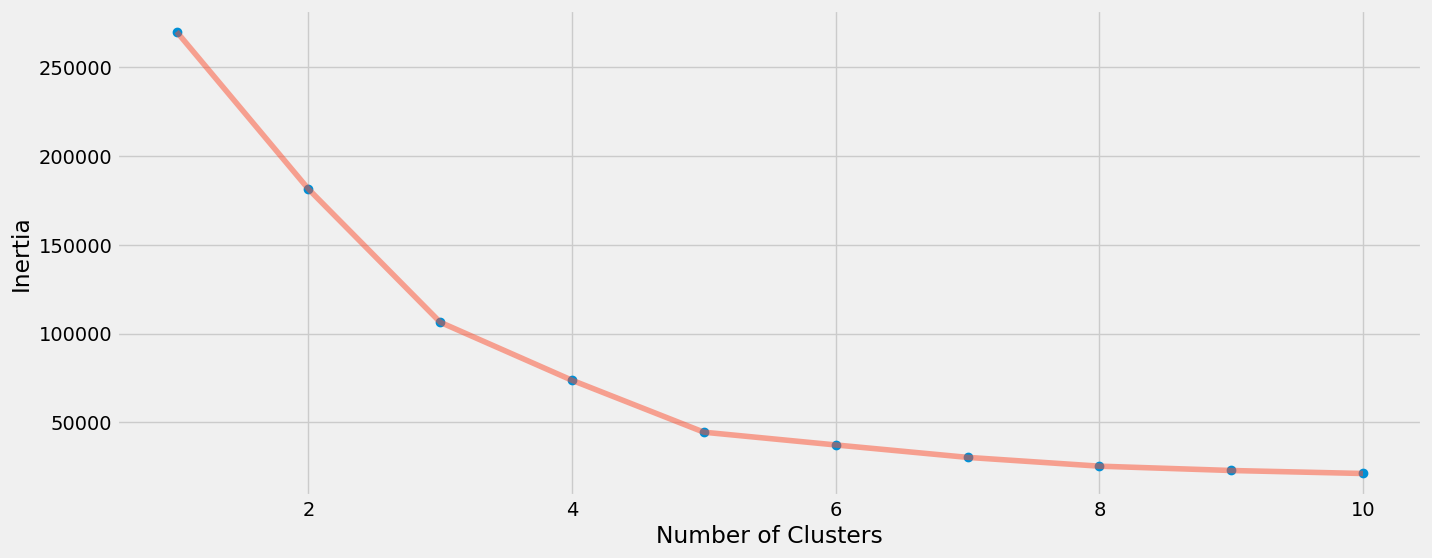

In [ ]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = KMeans(n_clusters = 4, init = 'random')
algorithm.fit(X2)
label2 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



- Tuổi, Thu nhập hằng năm và Số điểm mua sắm (thực hiện vẽ biểu đồ 3D để biểu
diễn kết quả gom cụm).

In [ ]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm = KMeans(n_clusters = n, init = 'random')
  algorithm.fit(X3)
  inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
algorithm = KMeans(n_clusters = 4, init = 'random')
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df['label3'] = labels3
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
      marker=dict(
          color = df['label3'],
          size = 20,
          line = dict (
              color = df['label3'],
              width = 12
          ),
          opacity = 0.8
      )
)

dat = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=dat, layout = layout)
py.offline.iplot(fig)